In [79]:
import pandas as pd

from sklearn.model_selection import train_test_split

from tensorflow import keras
from keras.models import Sequential 
from keras.layers import Dense
from tensorflow.keras import layers
import tensorflow as tf
import numpy as np

In [84]:
df = pd.read_excel('../data/join.xls', index_col=0)
df.head(3)

,"Угол нашивки, град",Шаг нашивки,Плотность нашивки,Соотношение матрица-наполнитель,"Плотность, кг/м3","модуль упругости, ГПа","Количество отвердителя, м.%","Содержание эпоксидных групп,%_2","Температура вспышки, С_2","Поверхностная плотность, г/м2","Модуль упругости при растяжении, ГПа","Прочность при растяжении, МПа","Потребление смолы, г/м2"
ИНДЕКС 1,,,,,,,,,,,,,
0,0,4.0,57.0,1.857143,2030.0,738.736842,30.0,22.267857,100.000000,210.0,70.0,3000.0,220.0
1,0,4.0,60.0,1.857143,2030.0,738.736842,50.0,23.750000,284.615385,210.0,70.0,3000.0,220.0
2,0,4.0,70.0,1.857143,2030.0,738.736842,49.9,33.000000,284.615385,210.0,70.0,3000.0,220.0


In [4]:
df.drop(['Угол нашивки, град', 'Потребление смолы, г/м2'], axis=1, inplace=True)
df = df.dropna()
df.head(3)

,Шаг нашивки,Плотность нашивки,Соотношение матрица-наполнитель,"Плотность, кг/м3","модуль упругости, ГПа","Количество отвердителя, м.%","Содержание эпоксидных групп,%_2","Температура вспышки, С_2","Поверхностная плотность, г/м2","Модуль упругости при растяжении, ГПа","Прочность при растяжении, МПа"
ИНДЕКС 1,,,,,,,,,,,
0,4.0,57.0,1.857143,2030.0,738.736842,30.0,22.267857,100.000000,210.0,70.0,3000.0
1,4.0,60.0,1.857143,2030.0,738.736842,50.0,23.750000,284.615385,210.0,70.0,3000.0
2,4.0,70.0,1.857143,2030.0,738.736842,49.9,33.000000,284.615385,210.0,70.0,3000.0


In [42]:
y = df['Модуль упругости при растяжении, ГПа']

X = df.iloc[:, 1:]
X = X.astype(float)
X.shape

(1023, 10)

In [43]:
y.shape

(1023,)

In [7]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)
X_train.shape

(716, 10)

In [8]:
X_train.head(3)

,Плотность нашивки,Соотношение матрица-наполнитель,"Плотность, кг/м3","модуль упругости, ГПа","Количество отвердителя, м.%","Содержание эпоксидных групп,%_2","Температура вспышки, С_2","Поверхностная плотность, г/м2","Модуль упругости при растяжении, ГПа","Прочность при растяжении, МПа"
ИНДЕКС 1,,,,,,,,,,
412,55.278331,2.885855,1951.714931,918.042452,198.953207,26.811285,286.748810,962.345527,73.662132,1379.568514
890,59.563595,0.927841,1952.857390,304.058314,105.938449,24.791859,318.140519,386.789237,72.221529,2640.186903
364,65.951288,3.170440,2048.585970,1210.607454,122.710723,21.442178,263.984442,681.714387,75.819722,2896.345346


In [9]:
y_train.head(3)

ИНДЕКС 1
412    73.662132
890    72.221529
364    75.819722
Name: Модуль упругости при растяжении, ГПа, dtype: float64

In [58]:
model = Sequential([
    Dense(16, activation='relu', input_dim=10),
    Dense(32, activation='relu'),
    Dense(32, activation='relu'),
    Dense(1, activation='softmax'),
])

model.compile(optimizer="rmsprop", loss="mse", metrics=["mse"])

model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_25 (Dense)             (None, 16)                176       
_________________________________________________________________
dense_26 (Dense)             (None, 32)                544       
_________________________________________________________________
dense_27 (Dense)             (None, 32)                1056      
_________________________________________________________________
dense_28 (Dense)             (None, 1)                 33        
Total params: 1,809
Trainable params: 1,809
Non-trainable params: 0
_________________________________________________________________


In [67]:
model.fit(X_train, y_train, batch_size=16, epochs=70)

Epoch 1/70
716/716 [==============================] - 0s 135us/step - loss: 5243.6644 - mean_squared_error: 5243.6644
Epoch 2/70
716/716 [==============================] - 0s 137us/step - loss: 5243.6644 - mean_squared_error: 5243.6644
Epoch 3/70
716/716 [==============================] - 0s 99us/step - loss: 5243.6645 - mean_squared_error: 5243.6645
Epoch 4/70
716/716 [==============================] - 0s 99us/step - loss: 5243.6645 - mean_squared_error: 5243.6645
Epoch 5/70
716/716 [==============================] - 0s 99us/step - loss: 5243.6645 - mean_squared_error: 5243.6645
Epoch 6/70
716/716 [==============================] - 0s 91us/step - loss: 5243.6645 - mean_squared_error: 5243.6645
Epoch 7/70
716/716 [==============================] - 0s 87us/step - loss: 5243.6644 - mean_squared_error: 5243.6644
Epoch 8/70
716/716 [==============================] - 0s 89us/step - loss: 5243.6645 - mean_squared_error: 5243.6645
Epoch 9/70
716/716 [==============================] - 0s 92us/

In [69]:
model.evaluate(X_test, y_test)

307/307 [==============================] - 0s 49us/step


[5235.254889174471, 5235.254889174471]

In [74]:
y_pred = model.predict(X_test)
y_pred

307/307 [==============================] - 0s 48us/step


array([[1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],

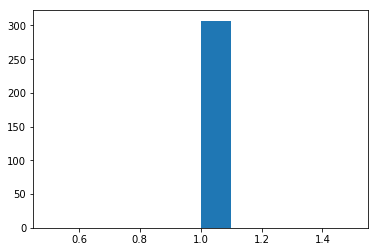

In [32]:
import matplotlib.pyplot as plt
plt.hist(y_pred);


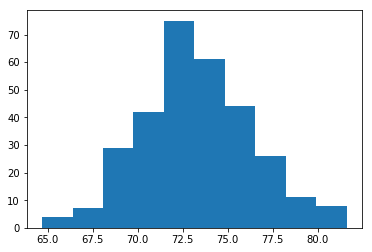

In [15]:
plt.hist(y_test);

In [16]:
model.save("composit_mlp_10")

In [17]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 32)                352       
_________________________________________________________________
dense_2 (Dense)              (None, 32)                1056      
_________________________________________________________________
dense_3 (Dense)              (None, 32)                1056      
_________________________________________________________________
dense_4 (Dense)              (None, 1)                 33        
Total params: 2,497
Trainable params: 2,497
Non-trainable params: 0
_________________________________________________________________


In [18]:
composit = np.array(X_test)[0]
composit
composit.shape

(10,)

In [19]:
composit.reshape(1, 10)

array([[  68.74052272,    2.83037356, 1959.30525381, 1121.55860496,
          72.34895613,   18.38283225,  284.44939274,  619.21132038,
          71.69146046, 2213.35181086]])

In [20]:
model.predict(composit.reshape(1, 10))

array([[1.]], dtype=float32)

In [21]:
y_pred.reshape(X_test.shape[0])

array([1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1.

In [22]:
np.array(y_test)

array([71.69146046, 72.68827876, 77.82523526, 72.2892841 , 71.67470565,
       73.13718881, 75.1622076 , 73.75071868, 77.36164103, 73.90938304,
       76.39887496, 74.8381366 , 72.47786487, 75.67565704, 72.84334423,
       66.82442711, 78.39956241, 76.53423466, 71.92750651, 70.88140091,
       73.59381713, 76.37126764, 74.65915915, 72.02449386, 74.50558432,
       68.00577162, 78.89128757, 70.4041946 , 74.67237739, 77.99479636,
       73.25372466, 72.45644746, 76.66083506, 73.53766298, 77.85628386,
       74.62868442, 74.8167635 , 72.51547633, 72.48654598, 76.82141835,
       74.44388466, 74.49750423, 76.82384154, 69.58231422, 70.36192371,
       71.90409521, 72.17952646, 66.73384594, 71.2374084 , 71.0395502 ,
       79.29058731, 67.4514897 , 73.78117768, 69.77582416, 71.42527087,
       73.49809312, 77.33630738, 74.83796665, 69.49243311, 75.61851501,
       72.50933189, 75.46012916, 76.00711488, 68.97646599, 74.07491011,
       69.03945649, 72.75995901, 72.03905265, 73.39002922, 71.14

In [23]:
X_test.head(1)

,Плотность нашивки,Соотношение матрица-наполнитель,"Плотность, кг/м3","модуль упругости, ГПа","Количество отвердителя, м.%","Содержание эпоксидных групп,%_2","Температура вспышки, С_2","Поверхностная плотность, г/м2","Модуль упругости при растяжении, ГПа","Прочность при растяжении, МПа"
ИНДЕКС 1,,,,,,,,,,
614,68.740523,2.830374,1959.305254,1121.558605,72.348956,18.382832,284.449393,619.21132,71.69146,2213.351811


In [24]:
X_test.columns

Index(['Плотность нашивки', 'Соотношение матрица-наполнитель',
       'Плотность, кг/м3', 'модуль упругости, ГПа',
       'Количество отвердителя, м.%', 'Содержание эпоксидных групп,%_2',
       'Температура вспышки, С_2', 'Поверхностная плотность, г/м2',
       'Модуль упругости при растяжении, ГПа',
       'Прочность при растяжении, МПа'],
      dtype='object')

In [25]:
composit = np.array(X_test)[0]
composit.shape
composit.reshape(1,10)

array([[  68.74052272,    2.83037356, 1959.30525381, 1121.55860496,
          72.34895613,   18.38283225,  284.44939274,  619.21132038,
          71.69146046, 2213.35181086]])

In [26]:
composit_pred = model.predict(composit.reshape((1, 10)))[0][0]
composit_pred


1.0

In [27]:
model.save("composit_mlp")